In [345]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [346]:
heart_df = pd.read_csv(r"D:\Deepak_Work\My Goal is Google\Heart_Diseases_Project\heart.csv")

In [347]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [348]:
print(
    f'Train data has {heart_df.shape[1]} features, {heart_df.shape[0]} observations.\nTrain features are:\n{heart_df.columns.tolist()}\n'
)

Train data has 14 features, 303 observations.
Train features are:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']



In [349]:
# Count the number of missing (null or NaN) values
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Then I decided to rename columns for easier understanding.

In [350]:
# Renaming columns
heart_df.columns = [
  'age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'HeartDisease' ]

In [351]:
# Number of unique observations:
heart_df.nunique()

age                         41
sex                          2
chest_pain_type              4
resting_blood_pressure      49
cholesterol                152
fasting_blood_sugar          2
rest_ecg                     3
max_heart_rate_achieved     91
exercise_induced_angina      2
st_depression               40
st_slope                     3
num_major_vessels            5
thalassemia                  4
HeartDisease                 2
dtype: int64

In [352]:
heart_df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,HeartDisease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [353]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  HeartDisease             303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [354]:
# Renaming Categorical data for easier understanding
heart_df['sex'] = heart_df['sex'].map({0:'female',1:'male'})
heart_df['chest_pain_type'] = heart_df['chest_pain_type'].map({
    3: 'asymptomatic', 1:'atypical_angina',2: 'non_agina_pain', 0:'typical_angina'
})
heart_df['fasting_blood_sugar'] = heart_df['fasting_blood_sugar'].map({
    0:'less_than_120mg/ml',1:'greater_than_120mg/ml'
})
heart_df['rest_ecg'] = heart_df['rest_ecg'].map({
    0:'normal',1:'ST-T_wave_abnormality',2:'left_ventricular_hypertrophy'
})
heart_df['exercise_induced_angina'] = heart_df['exercise_induced_angina'].map({
    0:'no',1:'yes'
})
heart_df['st_slope'] = heart_df['st_slope'].map({0:'upsloping',1:'flat',2:'downsloping'}) 
heart_df['thalassemia'] = heart_df['thalassemia'].map({
    1:'fixed_defect',0:'normal',2:'reversable_defect',3:'unknown'})
heart_df['HeartDisease'] = heart_df['HeartDisease'].map({0:'no_disease', 1:'has_disease'})


In [355]:
heart_df.nunique()

age                         41
sex                          2
chest_pain_type              4
resting_blood_pressure      49
cholesterol                152
fasting_blood_sugar          2
rest_ecg                     3
max_heart_rate_achieved     91
exercise_induced_angina      2
st_depression               40
st_slope                     3
num_major_vessels            5
thalassemia                  4
HeartDisease                 2
dtype: int64

In [356]:
# Before and After comparison
print("Missing Values After Changes:")
print(heart_df.isnull().sum())

Missing Values After Changes:
age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
HeartDisease               0
dtype: int64


In [357]:
heart_df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,HeartDisease
0,63,male,asymptomatic,145,233,greater_than_120mg/ml,normal,150,no,2.3,upsloping,0,fixed_defect,has_disease
1,37,male,non_agina_pain,130,250,less_than_120mg/ml,ST-T_wave_abnormality,187,no,3.5,upsloping,0,reversable_defect,has_disease
2,41,female,atypical_angina,130,204,less_than_120mg/ml,normal,172,no,1.4,downsloping,0,reversable_defect,has_disease
3,56,male,atypical_angina,120,236,less_than_120mg/ml,ST-T_wave_abnormality,178,no,0.8,downsloping,0,reversable_defect,has_disease
4,57,female,typical_angina,120,354,less_than_120mg/ml,ST-T_wave_abnormality,163,yes,0.6,downsloping,0,reversable_defect,has_disease


In [358]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    object 
 2   chest_pain_type          303 non-null    object 
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    object 
 6   rest_ecg                 303 non-null    object 
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    object 
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    object 
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    object 
 13  HeartDisease             303 non-null    object 
dtypes: float64(1), int64(5), o

In [359]:
# Getting dataset statistics
heart_df.describe()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.729373
std,9.082101,17.538143,51.830751,22.905161,1.161075,1.022606
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000


In [360]:
heart_df.describe(include="all")

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,HeartDisease
count,303.000000,303,303,303.000000,303.000000,303,303,303.000000,303,303.000000,303,303.000000,303,303
unique,NaN,2,4,NaN,NaN,2,3,NaN,2,NaN,3,NaN,4,2
top,NaN,male,typical_angina,NaN,NaN,less_than_120mg/ml,ST-T_wave_abnormality,NaN,no,NaN,downsloping,NaN,reversable_defect,has_disease
freq,NaN,207,143,NaN,NaN,258,152,NaN,204,NaN,142,NaN,166,165
mean,54.366337,NaN,NaN,131.623762,246.264026,NaN,NaN,149.646865,NaN,1.039604,NaN,0.729373,NaN,NaN
std,9.082101,NaN,NaN,17.538143,51.830751,NaN,NaN,22.905161,NaN,1.161075,NaN,1.022606,NaN,NaN
min,29.000000,NaN,NaN,94.000000,126.000000,NaN,NaN,71.000000,NaN,0.000000,NaN,0.000000,NaN,NaN
25%,47.500000,NaN,NaN,120.000000,211.000000,NaN,NaN,133.500000,NaN,0.000000,NaN,0.000000,NaN,NaN
50%,55.000000,NaN,NaN,130.000000,240.000000,NaN,NaN,153.000000,NaN,0.800000,NaN,0.000000,NaN,NaN
75%,61.000000,NaN,NaN,140.000000,274.500000,NaN,NaN,166.000000,NaN,1.600000,NaN,1.000000,NaN,NaN


In [361]:
# Get count + percentage in one table
missing_report = pd.DataFrame({
    'Missing_count' : heart_df.isnull().sum(),
    'Missing %' : (heart_df.isnull().sum() / len(heart_df))*100
})
print(missing_report)

                         Missing_count  Missing %
age                                  0        0.0
sex                                  0        0.0
chest_pain_type                      0        0.0
resting_blood_pressure               0        0.0
cholesterol                          0        0.0
fasting_blood_sugar                  0        0.0
rest_ecg                             0        0.0
max_heart_rate_achieved              0        0.0
exercise_induced_angina              0        0.0
st_depression                        0        0.0
st_slope                             0        0.0
num_major_vessels                    0        0.0
thalassemia                          0        0.0
HeartDisease                         0        0.0


# Data Preprocessing

In [362]:
# Checking the Null Values
heart_df.isna().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
HeartDisease               0
dtype: int64

In [363]:
# Checking the duplicates
heart_df.duplicated().sum()

1

In [364]:
# Show which rows are duplicates
heart_df[heart_df.duplicated(keep=False)]

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,HeartDisease
163,38,male,non_agina_pain,138,175,less_than_120mg/ml,ST-T_wave_abnormality,173,no,0.0,downsloping,4,reversable_defect,has_disease
164,38,male,non_agina_pain,138,175,less_than_120mg/ml,ST-T_wave_abnormality,173,no,0.0,downsloping,4,reversable_defect,has_disease


In [365]:
# Now Remove the Duplicate Rows
heart_df.drop_duplicates(inplace=True)
print("The new shape of our Dataframe after removing Duplicates", heart_df.shape)

The new shape of our Dataframe after removing Duplicates (302, 14)


In [366]:
# checking the number of unique value in each feature
heart_df.nunique()

age                         41
sex                          2
chest_pain_type              4
resting_blood_pressure      49
cholesterol                152
fasting_blood_sugar          2
rest_ecg                     3
max_heart_rate_achieved     91
exercise_induced_angina      2
st_depression               40
st_slope                     3
num_major_vessels            5
thalassemia                  4
HeartDisease                 2
dtype: int64

In [367]:
cat_col = heart_df.select_dtypes(include = 'object').columns
cat_col

Index(['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg',
       'exercise_induced_angina', 'st_slope', 'thalassemia', 'HeartDisease'],
      dtype='object')

In [368]:
heart_df['chest_pain_type'].unique()

array(['asymptomatic', 'non_agina_pain', 'atypical_angina',
       'typical_angina'], dtype=object)

### Converting Categorical Value into it's own numerical value
* sex: 0:'female',1:'male'
* chest_pain_type'3: 'asymptomatic', 1:'atypical_angina',2: 'non_agina_pain', 0:'typical_angina'
* fasting_blood_sugar0:'less_than_120mg/ml',1:'greater_than_120mg/ml'
* rest_ecg: 0:'normal',1:'ST-T_wave_abnormality',2:'left_ventricular_hypertrophy'
* exercise_induced_angina: 0:'no',1:'yes'
* st_slope: 0:'upsloping',1:'flat',2:'downsloping'
* thalassemia: 1:'fixed_defect',0:'normal',2:'reversable_defect',3:'unknown'
* HeartDisease: 0:'no_disease', 1:'has_disease'

In [369]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns you want to encode
categorical_cols = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 
                    'rest_ecg', 'exercise_induced_angina', 
                    'st_slope', 'thalassemia', 'HeartDisease']

# Apply Label Encoding on each column
for col in categorical_cols:
    le = LabelEncoder()
    heart_df[col] = le.fit_transform(heart_df[col])

print("Dataset converted to numeric format (kept original 14 columns)")
print("Shape:", heart_df.shape)
print(heart_df.head())


Dataset converted to numeric format (kept original 14 columns)
Shape: (302, 14)
   age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0   63    1                0                     145          233   
1   37    1                2                     130          250   
2   41    0                1                     130          204   
3   56    1                1                     120          236   
4   57    0                3                     120          354   

   fasting_blood_sugar  rest_ecg  max_heart_rate_achieved  \
0                    0         2                      150   
1                    1         0                      187   
2                    1         2                      172   
3                    1         0                      178   
4                    1         0                      163   

   exercise_induced_angina  st_depression  st_slope  num_major_vessels  \
0                        0            2.3         2             

In [370]:
heart_df

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,HeartDisease
0,63,1,0,145,233,0,2,150,0,2.3,2,0,0,0
1,37,1,2,130,250,1,0,187,0,3.5,2,0,2,0
2,41,0,1,130,204,1,2,172,0,1.4,0,0,2,0
3,56,1,1,120,236,1,0,178,0,0.8,0,0,2,0
4,57,0,3,120,354,1,0,163,1,0.6,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,3,140,241,1,0,123,1,0.2,1,0,3,1
299,45,1,0,110,264,1,0,132,0,1.2,1,0,3,1
300,68,1,3,144,193,0,0,141,0,3.4,1,2,3,1
301,57,1,3,130,131,1,0,115,1,1.2,1,1,3,1


In [371]:
heart_df['cholesterol'].value_counts()

cholesterol
204    6
197    6
234    6
212    5
254    5
      ..
284    1
224    1
167    1
276    1
131    1
Name: count, Length: 152, dtype: int64

#### Cholesterol can never be 0; it states that the reading was not properly noted.
* But if the Cholesterol value is 0, we can do several things, like.

#### Doing the same thing with the blood pressure

In [372]:
heart_df['resting_blood_pressure'].value_counts()

resting_blood_pressure
120    37
130    36
140    32
110    19
150    17
128    12
138    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1
129     1
172     1
164     1
Name: count, dtype: int64

In [373]:
heart_df['resting_blood_pressure'][heart_df['resting_blood_pressure']==0]

Series([], Name: resting_blood_pressure, dtype: int64)

#### Same Blood_Pressure can never be 0; it states that the reading was not properly noted.
* But if the Blood_Pressure value is 0, we can do several things, like we did with Cholesterol.

In [374]:
heart_df['resting_blood_pressure'].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164], dtype=int64)

In [375]:
heart_df['resting_blood_pressure'].isnull().sum()

0

In [376]:
heart_df['rest_ecg'].unique()

array([2, 0, 1])

In [377]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      302 non-null    int64  
 1   sex                      302 non-null    int32  
 2   chest_pain_type          302 non-null    int32  
 3   resting_blood_pressure   302 non-null    int64  
 4   cholesterol              302 non-null    int64  
 5   fasting_blood_sugar      302 non-null    int32  
 6   rest_ecg                 302 non-null    int32  
 7   max_heart_rate_achieved  302 non-null    int64  
 8   exercise_induced_angina  302 non-null    int32  
 9   st_depression            302 non-null    float64
 10  st_slope                 302 non-null    int32  
 11  num_major_vessels        302 non-null    int64  
 12  thalassemia              302 non-null    int32  
 13  HeartDisease             302 non-null    int32  
dtypes: float64(1), int32(8), int64(

### Now we perform Data Visulaization

In [378]:
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable


In [379]:
heart_df.sample()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,HeartDisease
18,43,1,3,150,247,1,0,171,0,1.5,0,0,2,0


In [380]:
heart_df.corr()['HeartDisease'][:-1].sort_values()

max_heart_rate_achieved   -0.419955
fasting_blood_sugar       -0.026826
cholesterol                0.081437
resting_blood_pressure     0.146269
rest_ecg                   0.166154
age                        0.221476
thalassemia                0.246948
sex                        0.283609
st_slope                   0.343940
num_major_vessels          0.408992
chest_pain_type            0.412621
st_depression              0.429146
exercise_induced_angina    0.435601
Name: HeartDisease, dtype: float64

In [381]:
import plotly.express as px

In [382]:
px.line(heart_df.corr()['HeartDisease'][:-1].sort_values())

### Age and Heart-Diseases Distribution

In [383]:
fig = px.sunburst(heart_df, path=['HeartDisease', 'age'], 
                  title = "Heart HeartDisease distribution by age")
fig.show()
#  0: "No Heart Disease", If a person is younger than 55, there is less chance of Heart disease. 
#  1: "Heart Disease Present"

In [384]:
px.histogram(heart_df,x='age',color='HeartDisease', color_discrete_sequence=px.colors.qualitative.Set3)

### Percentage of HeartDiseases data distribution

In [385]:
### Percentage of HeartDiseases data distribution
px.pie(heart_df, names='HeartDisease', title='Percentage of HeartDiseases data distribution', color_discrete_sequence=px.colors.qualitative.Set3)

### Sex vs Heart Disease

In [386]:
px.histogram(heart_df, x = 'sex', color = 'HeartDisease')
# 0: If we see females(0) have fewer cases of heart disease.
# 1: If we see that males(1) have higher chances of heart disease. 

### ChestPainType vs HeartDisease

In [387]:
px.histogram(heart_df,x='chest_pain_type', color = 'HeartDisease')
# chest_pain_type'3: 'asymptomatic', 1:'atypical_angina',2: 'non_agina_pain', 0:'typical_angina'

### RestingBP vs HeartDisease

In [388]:
heart_df['resting_blood_pressure'].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164], dtype=int64)

In [389]:
px.sunburst(heart_df,path=['HeartDisease','resting_blood_pressure'])

### FastingBS Vs Heart Disease

In [390]:
px.histogram(heart_df, x = 'fasting_blood_sugar', color = 'HeartDisease')
# fasting_blood_sugar0:'less_than_120mg/ml',1:'greater_than_120mg/ml'

### MaxHR vs Heart Disease

In [391]:
heart_df['max_heart_rate_achieved'].unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90],
      dtype=int64)

In [392]:
px.sunburst(heart_df, path = ['HeartDisease','max_heart_rate_achieved'])
# If the value goes lower, it says that the chances are higher for the patient to have a heart attack.

In [393]:
px.violin(heart_df,x = 'HeartDisease', y = 'max_heart_rate_achieved', color = 'HeartDisease')

In [394]:
### num_major_vessels  vs Heart Disease
px.violin(heart_df, x = 'HeartDisease', y = 'num_major_vessels' , color = 'HeartDisease')

### ST_slope vs Heart Disease

In [395]:
px.histogram(heart_df, x = 'st_slope', color = 'HeartDisease')
# In summary, we can see that patients with the st slope value as a flat slope and an up slope are going to have a high chance of getting heart disease.
# st_slope: 0:'upsloping',1:'flat',2:'downsloping'

### ExerciseAngina vs Heart Disease

In [396]:
### Angina is a chest pain
### exercise_induced_angina: 0:'no',1:'yes'
px.histogram(heart_df,x='exercise_induced_angina', color = 'HeartDisease')

In [397]:
heart_df.corr()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,HeartDisease
age,1.000000,-0.094962,0.102543,0.283121,0.207216,-0.119492,0.147137,-0.395235,0.093216,0.206040,0.164124,0.302261,0.031619,0.221476
sex,-0.094962,1.000000,0.014390,-0.057647,-0.195571,-0.046022,0.026693,-0.046439,0.143460,0.098322,0.032990,0.113060,0.124157,0.283609
chest_pain_type,0.102543,0.014390,1.000000,-0.040633,0.069274,0.038822,0.064743,-0.336440,0.386889,0.205420,0.155332,0.210365,0.127390,0.412621
resting_blood_pressure,0.283121,-0.057647,-0.040633,1.000000,0.125256,-0.178125,0.142291,-0.048023,0.068526,0.194600,0.122873,0.099248,0.025244,0.146269
cholesterol,0.207216,-0.195571,0.069274,0.125256,1.000000,-0.011428,0.167886,-0.005308,0.064099,0.050086,-0.000417,0.086878,0.102615,0.081437
fasting_blood_sugar,-0.119492,-0.046022,0.038822,-0.178125,-0.011428,1.000000,-0.071113,0.007169,-0.024729,-0.004514,-0.058654,-0.144935,0.046698,-0.026826
rest_ecg,0.147137,0.026693,0.064743,0.142291,0.167886,-0.071113,1.000000,-0.085250,0.087432,0.117510,0.137686,0.099088,-0.021989,0.166154
max_heart_rate_achieved,-0.395235,-0.046439,-0.336440,-0.048023,-0.005308,0.007169,-0.085250,1.000000,-0.377411,-0.342201,-0.384754,-0.228311,-0.032586,-0.419955
exercise_induced_angina,0.093216,0.143460,0.386889,0.068526,0.064099,-0.024729,0.087432,-0.377411,1.000000,0.286766,0.256106,0.125377,0.151246,0.435601
st_depression,0.206040,0.098322,0.205420,0.194600,0.050086,-0.004514,0.117510,-0.342201,0.286766,1.000000,0.576314,0.236560,0.133464,0.429146


<Axes: >

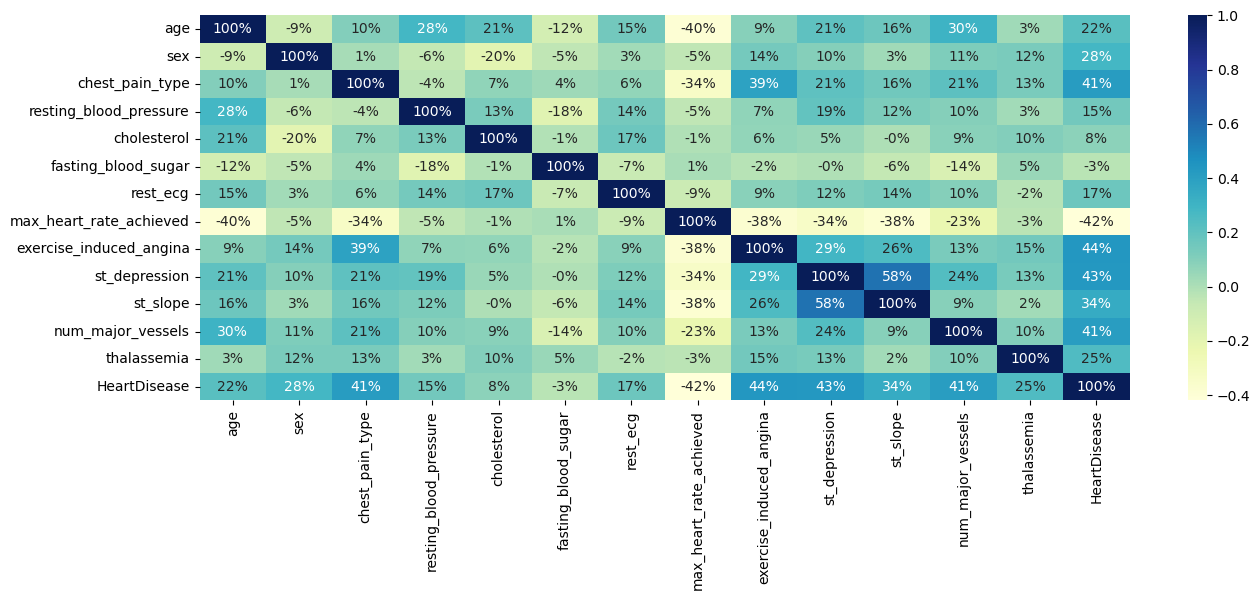

In [398]:
plt.figure(figsize=(15,5))
sns.heatmap(heart_df.corr(),annot=True,cmap="YlGnBu",fmt='.0%')

### Model Training

In [399]:
### Separate independent and dependent features 
X = heart_df.drop(columns = ['HeartDisease']) # independent
y = heart_df['HeartDisease'] # Dependent 

In [400]:
X.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,63,1,0,145,233,0,2,150,0,2.3,2,0,0
1,37,1,2,130,250,1,0,187,0,3.5,2,0,2
2,41,0,1,130,204,1,2,172,0,1.4,0,0,2
3,56,1,1,120,236,1,0,178,0,0.8,0,0,2
4,57,0,3,120,354,1,0,163,1,0.6,0,0,2


In [401]:
y

0      0
1      0
2      0
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    1
Name: HeartDisease, Length: 302, dtype: int32

In [402]:
### Apply Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size = 0.2, random_state = 42, stratify = y
)# keeps target distribution same in train & test, or we can say that the training as well as the testing set will contain the same proportion of the label classes which are present in the entire dataset.

In [403]:
X_train

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
187,54,1,3,124,266,1,2,109,1,2.2,1,1,3
114,55,1,1,130,262,1,0,155,0,0.0,0,0,2
93,54,0,1,132,288,0,2,159,1,0.0,0,1,2
61,54,1,1,108,309,1,0,156,0,0.0,0,0,3
247,66,1,1,160,246,1,0,120,1,0.0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,60,0,3,150,258,1,2,157,0,2.6,1,2,3
222,65,1,0,138,282,0,2,174,0,1.4,1,1,2
283,40,1,3,152,223,1,0,181,0,0.0,0,0,3
225,70,1,3,145,174,1,0,125,1,2.6,2,0,3


In [404]:
X_test

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
121,59,1,3,138,271,1,2,182,0,0.0,0,0,2
150,66,1,3,160,228,1,2,138,0,2.3,0,0,0
50,51,0,2,130,256,1,2,149,0,0.5,0,0,2
58,34,1,0,118,182,1,2,174,0,0.0,0,0,2
37,54,1,2,150,232,1,2,165,0,1.6,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,58,0,3,170,225,0,2,146,1,2.8,1,2,0
272,67,1,3,120,237,1,0,71,0,1.0,1,0,2
54,63,0,2,135,252,1,2,172,0,0.0,0,0,2
161,55,0,1,132,342,1,0,166,0,1.2,0,0,2


### Decision Tree Model

In [405]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

In [406]:
# Prepruning technique
parameter = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best', 'random'],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [3,4,5,6,7,8],
    'min_samples_split' : [2,3,4],
    'min_samples_leaf' : [1,2,3,4],
    'random_state' : [0,42]
}

In [407]:
dtree_model = DecisionTreeClassifier()
cv = GridSearchCV(dtree_model, param_grid = parameter, cv = 5, scoring = 'accuracy')
cv.fit(X_train,y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy', ...], 'max_depth': [3, 4, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, ...], ...}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [408]:
y_tree_pred = cv.predict(X_test)

In [409]:
confusion_matrix(y_test,y_tree_pred)

array([[26,  7],
       [ 9, 19]], dtype=int64)

<Axes: >

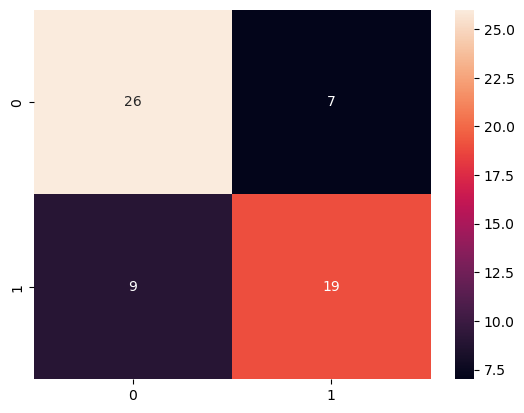

In [410]:
plt.ylabel('Actual')
plt.xlabel('Predicted')
sns.heatmap(confusion_matrix(y_test,y_tree_pred), annot=True, fmt='d')

In [411]:
print("Decision Tree Classifier")
conf_mat = confusion_matrix(y_test, y_tree_pred)
print('\n Confusion Matrix: \n', conf_mat)
Accuracy_Score = accuracy_score(y_test, y_tree_pred)
print('Accuracy_Score :', Accuracy_Score)
print('Accuracy in Percentage:', int(Accuracy_Score*100), '%')
print('\n', classification_report(y_tree_pred, y_test))

Decision Tree Classifier

 Confusion Matrix: 
 [[26  7]
 [ 9 19]]
Accuracy_Score : 0.7377049180327869
Accuracy in Percentage: 73 %

               precision    recall  f1-score   support

           0       0.79      0.74      0.76        35
           1       0.68      0.73      0.70        26

    accuracy                           0.74        61
   macro avg       0.73      0.74      0.73        61
weighted avg       0.74      0.74      0.74        61



### Random Forest Model

In [492]:
# Import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

In [493]:
# Creating a Random Forest Object
rf_model = RandomForestClassifier()

In [494]:
# Training the model
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [495]:
# Making the Prediction from the model
y_rf_pred = rf_model.predict(X_test)

In [496]:
# Creating Confusion Matrix
confusion_matrix(y_test,y_rf_pred)

array([[28,  5],
       [ 8, 20]], dtype=int64)

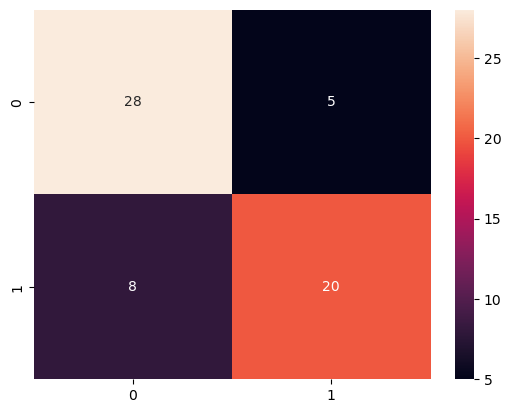

In [497]:
plt.ylabel('Actual')
plt.xlabel('predicted')
sns.heatmap(confusion_matrix(y_test,y_rf_pred), annot = True , fmt = 'd')   # fmt='d' shows integer value
plt.show()

In [498]:
print("Random Forest Classifier")
conf_mat = confusion_matrix(y_test, y_rf_pred)
print('\n Confusion Matrix: \n', conf_mat)
Accuracy_Score = accuracy_score(y_test, y_rf_pred)
print('Accuracy_Score :', Accuracy_Score)
print('Accuracy in Percentage:', int(Accuracy_Score*100), '%')
print('\n', classification_report(y_rf_pred, y_test))

Random Forest Classifier

 Confusion Matrix: 
 [[28  5]
 [ 8 20]]
Accuracy_Score : 0.7868852459016393
Accuracy in Percentage: 78 %

               precision    recall  f1-score   support

           0       0.85      0.78      0.81        36
           1       0.71      0.80      0.75        25

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



### Gaussian Naive Bayes Model

In [499]:
from sklearn.naive_bayes import GaussianNB

In [500]:
naive_model = GaussianNB()
naive_model.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [501]:
y_naive_pred = naive_model.predict(X_test)

<Axes: >

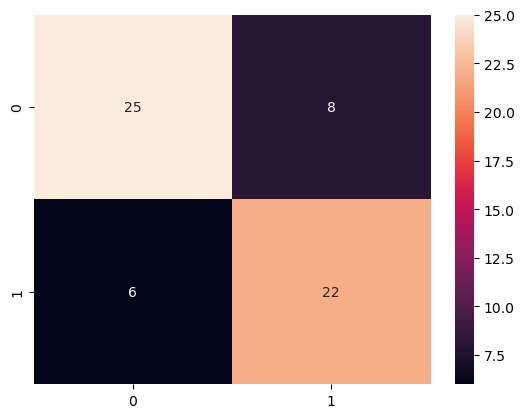

In [502]:
plt.ylabel('Actual')
plt.xlabel('Predicted')
sns.heatmap(confusion_matrix(y_test,y_naive_pred),annot=True,fmt='d')

In [503]:
print('Gussian NB Classifier')
conf_mat = confusion_matrix(y_test,y_naive_pred)
print('\n Confusion_matrix: \n', conf_mat)
Accuracy_score = accuracy_score(y_test,y_naive_pred)
print('Accuracy Score:', Accuracy_score)
print('Accuracy Score in Percentage:', int(Accuracy_score*100),'%')
print('\n',classification_report(y_naive_pred,y_test))

Gussian NB Classifier

 Confusion_matrix: 
 [[25  8]
 [ 6 22]]
Accuracy Score: 0.7704918032786885
Accuracy Score in Percentage: 77 %

               precision    recall  f1-score   support

           0       0.76      0.81      0.78        31
           1       0.79      0.73      0.76        30

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



### Feature Scaling Of data

In [504]:
from sklearn.preprocessing import StandardScaler

In [505]:
scaler = StandardScaler()

In [506]:
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [507]:
X_train_scaled,X_test_scaled

(array([[-0.05816415,  0.6983225 ,  0.86043963, ...,  0.64666263,
          0.4072896 ,  0.97457073],
        [ 0.05308632,  0.6983225 , -1.19268859, ..., -0.99381835,
         -0.69559572, -0.39096151],
        [-0.05816415, -1.43200311, -1.19268859, ..., -0.99381835,
          0.4072896 , -0.39096151],
        ...,
        [-1.61567072,  0.6983225 ,  0.86043963, ..., -0.99381835,
         -0.69559572,  0.97457073],
        [ 1.72184337,  0.6983225 ,  0.86043963, ...,  2.2871436 ,
         -0.69559572,  0.97457073],
        [ 0.05308632,  0.6983225 ,  0.86043963, ...,  0.64666263,
          0.4072896 ,  0.97457073]]),
 array([[ 4.98088202e-01,  6.98322505e-01,  8.60439627e-01,
          3.84177182e-01,  4.14891782e-01,  4.25878561e-01,
          1.02312728e+00,  1.46282285e+00, -7.24787180e-01,
         -9.11419950e-01, -9.93818351e-01, -6.95595718e-01,
         -3.90961514e-01],
        [ 1.27684149e+00,  6.98322505e-01,  8.60439627e-01,
          1.63765867e+00, -3.91470471e-01,  4.

### Logistic Regression

In [508]:
# Importing Logistic Regression
from sklearn.linear_model import LogisticRegression

In [509]:
# creating object from model
log_model = LogisticRegression()
# Training the model by fitting the data
log_model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [510]:
# Predicting the model
y_log_pred = log_model.predict(X_test)

<Axes: >

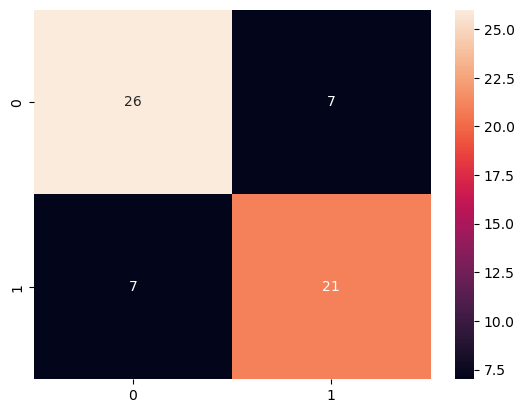

In [511]:
plt.ylabel('Actual')
plt.xlabel('Predicted')
sns.heatmap(confusion_matrix(y_test,y_log_pred),annot=True,fmt='d')

In [512]:
print('Logistic Regression')
conf_mat = confusion_matrix(y_test,y_log_pred)
print('\n Confusion_matrix: \n', conf_mat)
Accuracy_score = accuracy_score(y_test,y_log_pred)
print('Accuracy Score:', Accuracy_score)
print('Accuracy Score in Percentage:', int(Accuracy_score*100),'%')
print('\n',classification_report(y_log_pred,y_test))

Logistic Regression

 Confusion_matrix: 
 [[26  7]
 [ 7 21]]
Accuracy Score: 0.7704918032786885
Accuracy Score in Percentage: 77 %

               precision    recall  f1-score   support

           0       0.79      0.79      0.79        33
           1       0.75      0.75      0.75        28

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



### SVM Model

In [513]:
# importing the model
from sklearn.svm import SVC

In [514]:
# creating the object of the model
svc_model = SVC()
# Training the model by fitting the data
svc_model.fit(X_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [515]:
# Predict the model
y_svc_pred = svc_model.predict(X_test)

<Axes: >

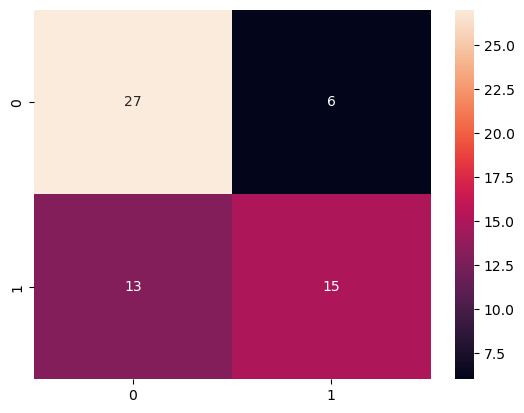

In [516]:
plt.ylabel('Actual')
plt.xlabel('Predicted')
sns.heatmap(confusion_matrix(y_test,y_svc_pred),annot=True,fmt='d')

In [517]:
print('Support Vector Classifier')
conf_mat = confusion_matrix(y_test,y_svc_pred)
print('\n Confusion_matrix: \n', conf_mat)
Accuracy_score = accuracy_score(y_test,y_svc_pred)
print('Accuracy Score:', Accuracy_score)
print('Accuracy Score in Percentage:', int(Accuracy_score*100),'%')
print('\n',classification_report(y_svc_pred,y_test))

Support Vector Classifier

 Confusion_matrix: 
 [[27  6]
 [13 15]]
Accuracy Score: 0.6885245901639344
Accuracy Score in Percentage: 68 %

               precision    recall  f1-score   support

           0       0.82      0.68      0.74        40
           1       0.54      0.71      0.61        21

    accuracy                           0.69        61
   macro avg       0.68      0.69      0.68        61
weighted avg       0.72      0.69      0.70        61



### KNN Model

In [518]:
# Importing KNN model
from sklearn.neighbors import KNeighborsClassifier

In [519]:
# creating the object of the model
knn_model = KNeighborsClassifier()
# Training the model by fitting the data
knn_model.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [520]:
# Predict the model
y_knn_pred = knn_model.predict(X_test)

<Axes: >

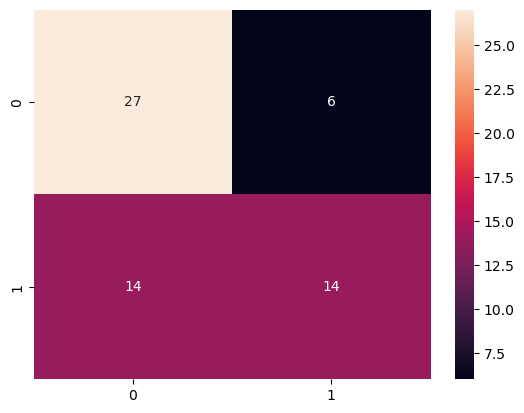

In [521]:
plt.ylabel('Actual')
plt.xlabel('Predicted')
sns.heatmap(confusion_matrix(y_test,y_knn_pred),annot=True,fmt='d')

In [522]:
print('KNN Classifier')
conf_mat = confusion_matrix(y_test,y_knn_pred)
print('\n Confusion_matrix: \n', conf_mat)
Accuracy_score = accuracy_score(y_test,y_knn_pred)
print('Accuracy Score:', Accuracy_score)
print('Accuracy Score in Percentage:', int(Accuracy_score*100),'%')
print('\n',classification_report(y_knn_pred,y_test))

KNN Classifier

 Confusion_matrix: 
 [[27  6]
 [14 14]]
Accuracy Score: 0.6721311475409836
Accuracy Score in Percentage: 67 %

               precision    recall  f1-score   support

           0       0.82      0.66      0.73        41
           1       0.50      0.70      0.58        20

    accuracy                           0.67        61
   macro avg       0.66      0.68      0.66        61
weighted avg       0.71      0.67      0.68        61



# Random Forest with parameters tuning using RandomCV

In [523]:
n_estimators = [int(x) for x in np.linspace(start = 40, stop = 70, num = 6)]
# Number of features to consider at every split
# max_features = ['auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start = 10, stop = 40, num = 7)]
# Minimum number of samples required to split a node
min_samples_split = [15,20,25,30]
# Minimum number of samples required at each node
min_samples_leaf = [15,20,25,30]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# bootstrap = [True]
criterion=["gini","entropy"]

In [524]:
# Create the param Distribution
param_dist = {'n_estimators': n_estimators,
              'max_depth' : max_depth,
              'min_samples_split': min_samples_split, 
              'min_samples_leaf': min_samples_leaf, 
              'bootstrap': bootstrap,
              'criterion' : criterion
             }
print(param_dist)

{'n_estimators': [40, 46, 52, 58, 64, 70], 'max_depth': [10, 15, 20, 25, 30, 35, 40], 'min_samples_split': [15, 20, 25, 30], 'min_samples_leaf': [15, 20, 25, 30], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']}


In [525]:
rf_Model = RandomForestClassifier(criterion = 'gini', random_state = 20)

In [526]:
from sklearn.model_selection import RandomizedSearchCV
rf_randcv =  RandomizedSearchCV(estimator = rf_Model, param_distributions = param_dist)
rf_randcv.fit(X_train, y_train)

,estimator,RandomForestC...ndom_state=20)
,param_distributions,"{'bootstrap': [True, False], 'criterion': ['gini', 'entropy'], 'max_depth': [10, 15, ...], 'min_samples_leaf': [15, 20, ...], ...}"
,n_iter,10
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [527]:
rf_randcv.best_params_

{'n_estimators': 64,
 'min_samples_split': 25,
 'min_samples_leaf': 25,
 'max_depth': 10,
 'criterion': 'entropy',
 'bootstrap': False}

In [528]:
rf_rcv_model = RandomForestClassifier(
 n_estimators= 64,
 min_samples_split= 25,
 min_samples_leaf= 25,
 max_depth= 10,
 criterion= 'entropy',
 bootstrap= False
)
rf_rcv_model.fit(X_train,y_train)
yrf_rcv_pred = rf_rcv_model.predict(X_test)  

<Axes: >

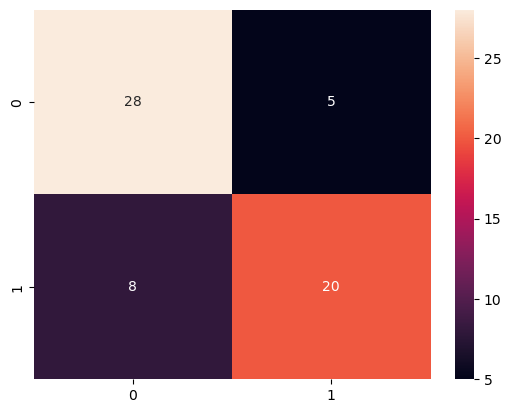

In [529]:
plt.ylabel('Actual')
plt.xlabel('Predicted')
sns.heatmap(confusion_matrix(y_test,y_rf_pred),annot=True,fmt='d')

In [530]:
print('Random Forest with parameters tuning using RandomCV')
conf_mat=confusion_matrix(y_test, yrf_rcv_pred)
print('\n Confusion Matrix : \n', conf_mat)
Accuracy_score=accuracy_score(y_test,yrf_rcv_pred)
print('Accuracy Score : ', Accuracy_score)
print('Accuracy in Percentage : ',int(Accuracy_score*100),'%')
print('\n',classification_report(yrf_rcv_pred,y_test))

Random Forest with parameters tuning using RandomCV

 Confusion Matrix : 
 [[30  3]
 [ 8 20]]
Accuracy Score :  0.819672131147541
Accuracy in Percentage :  81 %

               precision    recall  f1-score   support

           0       0.91      0.79      0.85        38
           1       0.71      0.87      0.78        23

    accuracy                           0.82        61
   macro avg       0.81      0.83      0.81        61
weighted avg       0.84      0.82      0.82        61



In [531]:
print (f'Train Accuracy - : {rf_randcv.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_randcv.score(X_test,y_test):.3f}');

Train Accuracy - : 0.863
Test Accuracy - : 0.803


In [532]:
### Showing the accuracy of every ML Model

In [533]:
accuracy = {'RandomForestClassifier': accuracy_score(y_test,y_rf_pred),
            'RandomForest with parameter tuning RandomCV': accuracy_score(y_test, yrf_rcv_pred),
            'GaussianNB':  accuracy_score(y_test,y_naive_pred),
            'LogisticRegression':  accuracy_score(y_test,y_log_pred),
            'SVC': accuracy_score(y_test,y_svc_pred),
            'KNeighborsClassifier':  accuracy_score(y_test,y_knn_pred),
            'DecisionTreeClassifier':  accuracy_score(y_test,y_tree_pred),
}
for key, value in accuracy.items():
    print('The Accuracy of ', key, 'is:',np.round(value*100,2), '%' )
    

The Accuracy of  RandomForestClassifier is: 78.69 %
The Accuracy of  RandomForest with parameter tuning RandomCV is: 81.97 %
The Accuracy of  GaussianNB is: 77.05 %
The Accuracy of  LogisticRegression is: 77.05 %
The Accuracy of  SVC is: 68.85 %
The Accuracy of  KNeighborsClassifier is: 67.21 %
The Accuracy of  DecisionTreeClassifier is: 73.77 %


### Now we Deploy our Project 

In [455]:
import pickle

# List of models and file names
models = {
    "DecisionTree": dtree_model,
    "RandomForest": rf_model,
    "NaiveBayes": naive_model,
    "LogisticRegression": log_model,
    "SVC": svc_model,
    "KNN": knn_model,
    "RandomForest_RandomCV": rf_rcv_model
}

# Save each model properly with unique file names
with open("DecisionTree.pkl", "wb") as f:
    pickle.dump(cv.best_estimator_, f)

with open("RandomForest.pkl", "wb") as f:
    pickle.dump(rf_model, f)

with open("NaiveBayes.pkl", "wb") as f:
    pickle.dump(naive_model, f)

with open("LogisticRegression.pkl", "wb") as f:
    pickle.dump(log_model, f)

with open("SVC.pkl", "wb") as f:
    pickle.dump(svc_model, f)

with open("KNN.pkl", "wb") as f:
    pickle.dump(knn_model, f)

with open("RandomForest_RandomCV.pkl", "wb") as f:
    pickle.dump(rf_rcv_model, f) 
